<a href="https://colab.research.google.com/github/akhils-codes1/random_vs_des/blob/main/random_vs_des_10000_tl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/random_vs_DES/tl/

/content/gdrive/MyDrive/random_vs_DES/tl


In [3]:
import pandas as pd
import numpy as np
import random
newdf = pd.read_csv("ptrain_random_des.csv")

In [8]:
newdf.head(20)

,Unnamed: 0,Unnamed: 0.1,CID,Text,class
0,21426,5281,5281,d7dc46ecffe734a8948dd8b2b46db832a4c03dc7486053...,1
1,4514,17397,17397,91c2eff802fb8711a0f0d0ba2e5628e49fa93f5886c088...,0
2,3991,15455,15455,19236ae358e1863675659ed77512dbb66b99f23d9fa4d0...,0
3,4548,17531,17531,ab33e787b426b8625cfb8189916c10fd2c4c40439850ee...,0
4,2334,9304,9304,76cadd0dfefef44adff721aa34b9eec57acfd60c403d91...,0
5,20932,3453,3453,12573b893e53b00ac921dbe73e239131e31ee937831440...,1
6,2694,10677,10677,4794eab721563693bb6a89593d14dc016fc306fb409000...,0
7,191,851,851,dc8cc4e9362d8101e4842aadfa8b9e1249a75a6b115628...,0
8,20727,2594,2594,875071357390dfa75395e284d7121056624af94f785531...,1
9,22447,9406,9406,ac71fe45e478d1fbe2e97d550b04d30b220b163deb49e6...,1


In [9]:
import pandas as pd
import numpy as np
import os

In [10]:
!pwd

/content/gdrive/MyDrive/random_vs_DES/tl


In [11]:
ndf = pd.read_csv("ptrain_random_des.csv")
#ndf = pd.read_csv("ptest_random_des.csv")
len(ndf.iloc[0]['Text'])

2000

In [ ]:
def checksample(csv_file):
    df = pd.read_csv(csv_file)
    a = df.iloc[0]['Text']
    b = [int(a[i:i+17],16) for i in range(0,2000-11,17)]
    # print(b)
    c = []
    for i in b:
        for j in range(-31,1):
            c.append(str((i>>(-j))&1))
    print(len(c))
    d = " ".join(c+['1']*100)
    d = d.replace('1','255')
    d+=" "
    f = open("new.pnm","w")
    f.write("P2 62 62 255\n")
    f.write(d)
    f.close()
    os.system("pnmtopng -compression 0 new.pnm > new.png")
    img = imread("new.png")
    plt.figure()
    plt.imshow(img,cmap='gray')

3744


pnmtopng: 2 colors found
/tmp/ipykernel_59323/1096608526.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread("new.png")


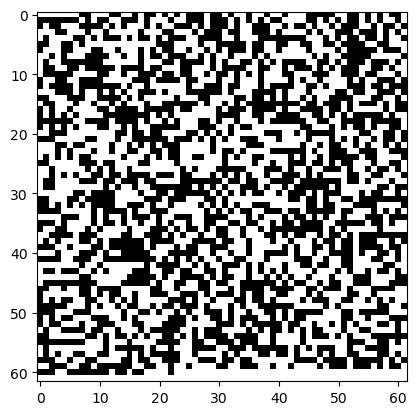

In [ ]:
checksample("ptrain_random_des.csv")

In [ ]:
ldf = len(ndf)
ldf

1000

In [ ]:
path = !pwd
path = path[0]
path

'/home/d/Downloads/random_vs_des_10000_dscappraoch'

In [ ]:
class_count = np.zeros(5)
for i in range(ldf):
    txt = ndf.iloc[i]['Text']
    clabel = ndf.iloc[i]['class']
    b = [int(txt[i:i+17],16) for i in range(0,2000-11,17)]
    c = []
    for ii in b:
        for j in range(-31,1):
            c.append(str((ii>>(-j))&1))
    s = " ".join(c+['1']*100)
    s = s.replace('1','255')
    s+=" "
    #d = [str(int(''.join(c[k:k+8]),2)) for k in range(0,3744,8)]+['255']*16
    #s = " ".join(d)
    #s = s+" "
    class_count[int(clabel)]+=1
    fname = str(clabel)+"_"+str(int(class_count[int(clabel)]))+".pgm"
    f = open(path+'/pgm/'+fname,"w")
    f.write("P2 62 62 255\n")
    f.write(s)
    f.close()
    os.system("pnmtopng -compression 0 "+path+'/pgm/'+fname+" > "+path+'/png/'+fname[:-3]+"png")

pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found


pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found


pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
pnmtopng: 2 colors found
